In [25]:
#Load matlab data and export as CSV since easier to parse.
%matplotlib inline
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = scipy.io.loadmat("../assignment/feat_vec.mat")
data1 = scipy.io.loadmat("../assignment/feat_vec_rnn.mat")
labels = scipy.io.loadmat("../assignment/labels.mat")

for i in data:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("feat_vec.csv"),data[i],delimiter=',')

#print(data1)
#csvwrite('feat_vec_rnn.csv', data1)

'''
for i in data1:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("feat_vec_rnn.csv"),data1[i],delimiter=',')
'''
for i in labels:
    if '__' not in i and 'readme' not in i:
        np.savetxt(("labels.csv"), labels[i], delimiter=',')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Oct 20 23:57:07 2019', '__version__': '1.0', '__globals__': [], 'feat_vec_rnn': array([[[-2.37205191e+00,  3.96108344e-01, -1.89476655e+00, ...,
         -6.52130470e-03,  1.60686423e+00, -1.62091415e+00],
        [-8.25854243e-02, -3.08491093e-01, -3.93635629e-01, ...,
          4.67203317e-02,  2.50425574e-01, -7.24836857e-01],
        [-1.04161917e+00, -1.88632334e-01,  1.92797725e-01, ...,
          1.08003002e-02,  6.66496918e-01,  3.96291584e-01],
        ...,
        [ 1.11299766e-01,  6.82368951e-02,  2.59968744e-01, ...,
          5.57547823e-02, -1.42517711e-01, -6.12323075e-02],
        [-1.41206846e-01, -4.24852419e-02, -1.37575253e-01, ...,
          2.29372524e-02, -4.24865892e-01, -2.13950607e-01],
        [-2.30763189e-01, -1.02868476e-01,  1.33236408e-01, ...,
          1.44300731e-02, -2.25880858e-01,  1.52612568e-01]],

       [[ 9.54981482e-01, -1.68455948e+00,  2.07056674e+00, ...,
         -5

In [27]:
#Instead of his features, we load our own features that we know of
#Saves a pickle dictionary of features, and an array of their values in respect to time.
import glob, os
#import ujson
import json
import pickle
from scipy import signal
%matplotlib inline
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

features_to_select = ["sF1", "sF2", "sF3", "sF4", "SHR", "Energy"]

labels = []
#Iterate files, generate list of mat files
files = glob.glob("../data/*.mat")
print(files)
voice_speakers = []
for file in files:
    #Create features
    #os.chdir("../data")
    data = scipy.io.loadmat(file, verify_compressed_data_integrity=False)
    features = []
    
    filename = os.path.basename(file)
    print(filename)
    for feature in features_to_select:
        feature_data = data[feature]
        feature_data = feature_data[~np.isnan(feature_data)]
        #os.chdir("../processed_data")
        #Compute the weighted average then downsample (decimate)
        '''
        N = 2048
        #print(feature_data)
        if feature_data != []:
            x = np.convolve(feature_data, np.ones((N,))/N, mode='valid')
            cnt = 0
            x_decim = []
            for index in range(0, N, len(x)-1):
                x_decim.append(x[index])
                cnt += 1
        else:
            x = []
        '''
        feature_data = np.array_split(feature_data, 32)
        feat_processed = []
        for chunk in feature_data:
            if chunk.size > 0:
                max_val = np.amax(chunk)
                if max_val != None:
                    feat_processed.append(max_val)
                else:
                    feat_processed.append(0)
            else:
                feat_processed.append(0) #Make Farsi complete NaN example work
        features.append(feat_processed)
    
    feature_dict = dict(zip(features_to_select, features))
    voice_speakers.append(feature_dict)
    pickle.dump(feature_dict, open("../processed_data/" + filename + ".pkl", 'wb'))
    #Create labels
    if "english" in filename:
        labels.append(1)
    else:
        labels.append(0)
        
pickle.dump(labels, open("../processed_data/" + "labels.pkl", 'wb'))
pickle.dump(voice_speakers, open("../processed_data/" + "voice_speakers.pkl", 'wb'))


['../data\\afrikaans1.mat', '../data\\afrikaans2.mat', '../data\\afrikaans3.mat', '../data\\armenian1.mat', '../data\\armenian3.mat', '../data\\armenian5.mat', '../data\\armenian6.mat', '../data\\danish1.mat', '../data\\danish2.mat', '../data\\danish5.mat', '../data\\danish6.mat', '../data\\english1.mat', '../data\\english100.mat', '../data\\english101.mat', '../data\\english102.mat', '../data\\english103.mat', '../data\\english104.mat', '../data\\english105.mat', '../data\\english108.mat', '../data\\english109.mat', '../data\\english11.mat', '../data\\english111.mat', '../data\\english112.mat', '../data\\english119.mat', '../data\\english12.mat', '../data\\english124.mat', '../data\\english125.mat', '../data\\english127.mat', '../data\\english128.mat', '../data\\english13.mat', '../data\\english130.mat', '../data\\english131.mat', '../data\\english132.mat', '../data\\english136.mat', '../data\\english138.mat', '../data\\english14.mat', '../data\\english148.mat', '../data\\english150.m

###### We now have our data, now let's plot to see which features are good features

In [ ]:
#Plotting code to see features (Outdated, we are using new features)

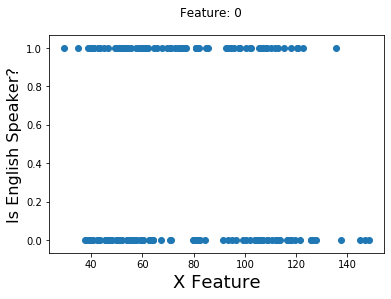

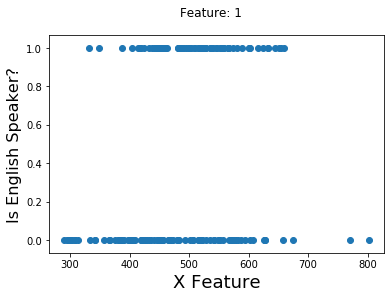

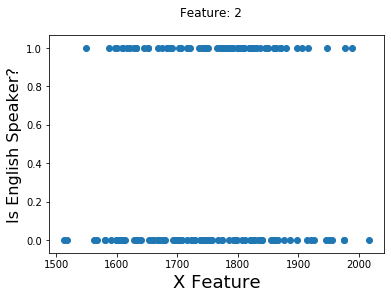

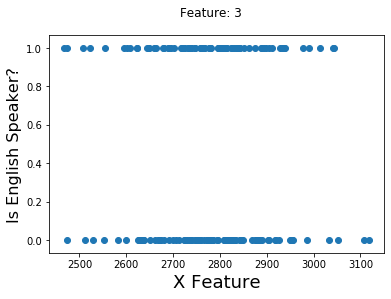

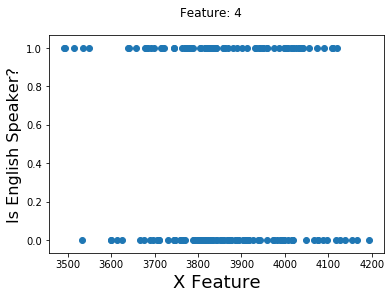

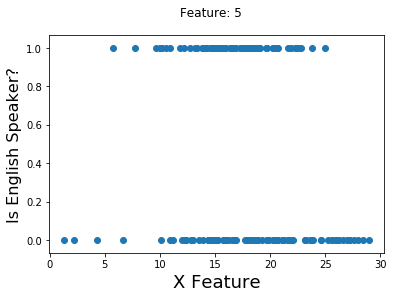

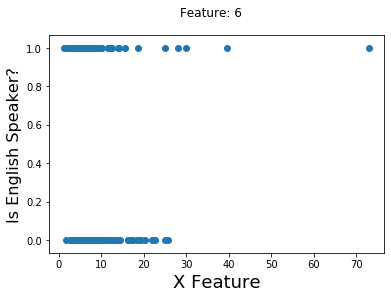

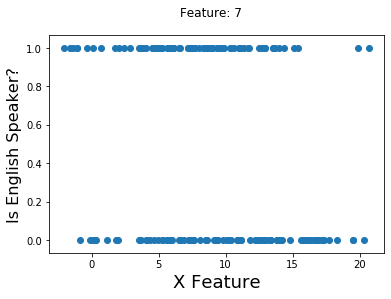

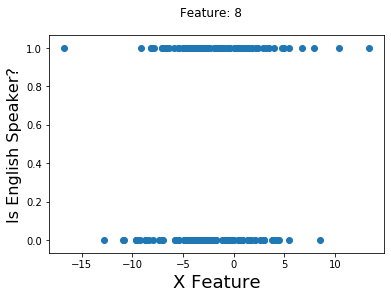

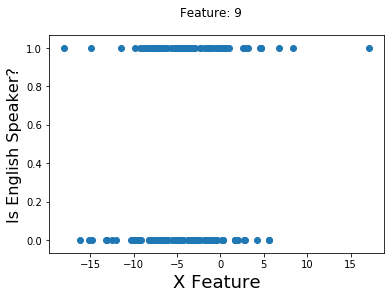

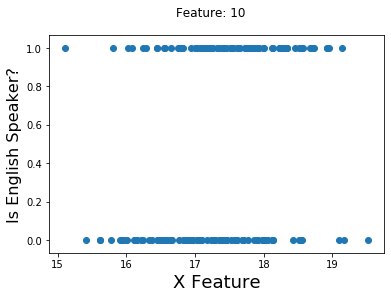

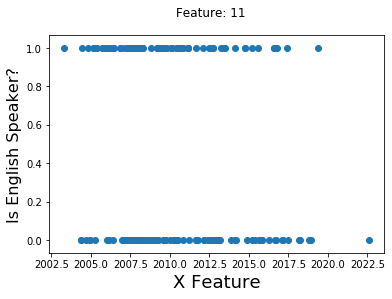

In [27]:
#Take CSV and plot.

feature_list = [""]

#data_frame = pd.read_csv('feat_vec.csv', sep=',',header=None)
#print(data_frame.values)

#data_frame_rnn = pd.read_csv('feat_vec_rnn.csv', sep=',', header=None)

y_data = pd.read_csv('labels.csv', sep=',', header=None)

#PLOT HERE

for (columnName, columnData) in data_frame.iteritems():
   #print('Column Name : ', columnName)
   #print('Column Contents : ', columnData.values)
   '''Above lines are to make sure we didn't screw up loading of csv'''
   fig = plt.figure()
   x = columnData
   y = y_data
   plt.scatter(x, y)
   fig.suptitle('Feature: ' + str(columnName), fontsize=12)
   plt.xlabel('X Feature', fontsize=18)
   plt.ylabel('Is English Speaker?', fontsize=16)
   #plt.show(block=True)


In [ ]:
## Now that we've plotted, let's run our neural network and RNN with our selected features.

In [30]:
#Load data
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
labels = pickle.load(open("../processed_data/labels.pkl", 'rb'))
voice_speakers = pickle.load(open("../processed_data/voice_speakers.pkl", 'rb'))

test_size = 0.1

#voice_speakers and labels are guaranteed to be in line

all_features = []
for feature_dict in voice_speakers:
    feature_list = []
    for key in features_to_select:
        feature_list.append(feature_dict[key])
    #Create a matrix that is n features columns, sample times rows.
    np_feature_matrix = np.matrix(feature_list)
    all_features.append(np_feature_matrix)
    
#print(all_features)

X_train, X_test, y_train, y_test = train_test_split(all_features, labels, test_size = test_size, random_state = 29)
y_train, y_test = np.array(y_train), np.array(y_test)
X_train, X_test = np.array(X_train), np.array(X_test)
#print("X_test: " + str(X_test) + "y_test:" + str(y_test))
print("X_test: " + "[" + str(len(X_test)) + ", " + str((X_test[0].shape)) + "y_test: " + str(y_test))

#Each column contains the list of features, we will vectorize this after

print(y_train.shape)
print(len(X_train))


X_test: [17, (6, 32)y_test: [0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0]
(153,)
153


In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

#Onehot encode labels for Keras model (mandatory)
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')

_y_train = y_train.reshape(-1, 1)
_y_test = y_test.reshape(-1, 1)

_y_train = onehot_encoder.fit_transform(_y_train)
_y_test = onehot_encoder.fit_transform(_y_test)

#Vectorize X_train features
features_each_speaker = []
'''
for speaker in range(len(X_train)):
    features_input = []
    matrix = X_train[speaker]
    for index in range(matrix.shape[1]):
        column = matrix[:,index]
        features_input.append(column)
    features_each_speaker.append(features_input)
'''
print(X_train)
print(_y_train)

model = Sequential()

model.add(Dense(64, activation='softmax', input_shape=(X_train[0].shape[0], X_train[0].shape[1])))
#model.add(Dense(24, activation='softmax', input_shape=(X_train[0].shape[0],X_train[0].shape[1])))
model.add(Dense(64, activation='softmax'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='softmax'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))
model.add(Flatten())
model.add(Dense(2, activation='softmax', input_shape=(1, 2)))         

Adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)



model.compile(loss='binary_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])

history=model.fit(np.array(X_train), np.array(_y_train), validation_data=(X_test, _y_test), epochs=100)
#Neural Network achieved about 64% Accuracy using our model o

[[[1.36621680e+03 1.46791516e+03 1.46589709e+03 4.82114777e+02
   1.49733972e+03 7.59315674e+02 1.44477637e+03 1.49927966e+03
   1.49659998e+03 1.42669873e+03 1.49459949e+03 9.22576782e+02
   1.49698950e+03 1.48667566e+03 1.23190454e+03 8.29142090e+02
   1.44286096e+03 7.51981262e+02 6.65164734e+02 1.49633850e+03
   1.31022852e+03 1.49866370e+03 1.48629480e+03 1.42875879e+03
   1.23808716e+03 1.49286804e+03 1.47100391e+03 1.39838843e+03
   1.23537988e+03 1.49873047e+03 1.14991406e+03 1.29687366e+03]
  [2.63038525e+03 2.85978564e+03 2.60252661e+03 2.72800977e+03
   2.98642041e+03 2.44442749e+03 2.97002954e+03 3.11276953e+03
   2.90956152e+03 2.61486816e+03 2.67919336e+03 2.56806543e+03
   3.10886719e+03 2.58881128e+03 2.64394312e+03 2.48339502e+03
   2.42522778e+03 2.74785254e+03 2.96394653e+03 3.16443506e+03
   2.70331348e+03 2.84677075e+03 3.13448267e+03 3.08208228e+03
   3.14028784e+03 2.83480615e+03 2.86564331e+03 2.92177734e+03
   2.76543164e+03 2.71539624e+03 3.26045068e+03 2.6420

Train on 153 samples, validate on 17 samples
Epoch 1/100
153/153 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5163 - val_loss: 0.6810 - val_accuracy: 0.6471
Epoch 2/100
153/153 [==============================] - 0s 163us/step - loss: 0.6925 - accuracy: 0.5163 - val_loss: 0.6816 - val_accuracy: 0.6471
Epoch 3/100
153/153 [==============================] - 0s 176us/step - loss: 0.6930 - accuracy: 0.5163 - val_loss: 0.6821 - val_accuracy: 0.6471
Epoch 4/100
153/153 [==============================] - 0s 170us/step - loss: 0.6932 - accuracy: 0.5163 - val_loss: 0.6818 - val_accuracy: 0.6471
Epoch 5/100
153/153 [==============================] - 0s 163us/step - loss: 0.6935 - accuracy: 0.5163 - val_loss: 0.6844 - val_accuracy: 0.6471
Epoch 6/100
153/153 [==============================] - 0s 169us/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6850 - val_accuracy: 0.6471
Epoch 7/100
153/153 [==============================] - 0s 169us/step - loss: 0.6926 - a

Epoch 57/100
153/153 [==============================] - 0s 169us/step - loss: 0.6932 - accuracy: 0.5163 - val_loss: 0.6850 - val_accuracy: 0.6471
Epoch 58/100
153/153 [==============================] - 0s 176us/step - loss: 0.6931 - accuracy: 0.5163 - val_loss: 0.6844 - val_accuracy: 0.6471
Epoch 59/100
153/153 [==============================] - 0s 143us/step - loss: 0.6935 - accuracy: 0.5163 - val_loss: 0.6825 - val_accuracy: 0.6471
Epoch 60/100
153/153 [==============================] - 0s 143us/step - loss: 0.6931 - accuracy: 0.5163 - val_loss: 0.6830 - val_accuracy: 0.6471
Epoch 61/100
153/153 [==============================] - 0s 143us/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6829 - val_accuracy: 0.6471
Epoch 62/100
153/153 [==============================] - 0s 169us/step - loss: 0.6929 - accuracy: 0.5163 - val_loss: 0.6834 - val_accuracy: 0.6471
Epoch 63/100
153/153 [==============================] - 0s 163us/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6831 -